In [1]:
#import libraries
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
import seaborn as sns


# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [2]:
#import data and view
df = pd.read_csv("./db/clean_tweet_dataset.csv", lineterminator="\n")
df

,tweet,tweet_clean,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label
0,That just seriously ruined my night..,seriously ruined night,163,139,1560,1,25985,0,0,0,0,0,0
1,@JessleaC I no they are so funny ..! I love yo...,jessleac funny love pictures take really good ...,113,197,1072,1,2142,0,0,0,1,0,0
2,@honkwas might drive so we could go subway or ...,honkwas might drive could go subway mcdonalds ...,168,382,1732,1,3493,0,0,0,1,0,0
3,That @brad_frost post is bourne out by my expe...,bradfrost post bourne experience current proje...,285,596,5765,45,8670,0,0,0,1,0,0
4,why tf do i keep waking up every 2 hours -.-,tf keep waking every hours,631,353,1589,2,12285,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007996,I just reached level 78 in The Tribez! Join in...,reached level tribez join try overtake ipad i...,2,6,0,0,13562,0,0,3,0,1,1
1007997,Ima smash on site when I get that bitch,ima smash site get bitch,477,588,7048,0,18346,0,0,0,0,0,0
1007998,RT @NiallOfficial: Pukin on fans hahahaha! Whe...,rt niallofficial pukin fans hahahaha come,663,476,9079,4,36930,40219,0,0,1,0,0
1007999,we should of had Monday off,monday,297,1436,5815,0,5308,0,0,0,0,0,0


# Data Preprocessing

## Drop NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008001 entries, 0 to 1008000
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   tweet             1008001 non-null  object
 1   tweet_clean       1007749 non-null  object
 2   no_followers      1008001 non-null  int64 
 3   no_followings     1008001 non-null  int64 
 4   no_userfavorites  1008001 non-null  int64 
 5   no_lists          1008001 non-null  int64 
 6   no_tweets         1008001 non-null  int64 
 7   no_retweets       1008001 non-null  int64 
 8   no_favorites      1008001 non-null  int64 
 9   no_hashtags       1008001 non-null  int64 
 10  no_usermentions   1008001 non-null  int64 
 11  no_urls           1008001 non-null  int64 
 12  label             1008001 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 100.0+ MB


In [4]:
df.isna().sum()

tweet                 0
tweet_clean         252
no_followers          0
no_followings         0
no_userfavorites      0
no_lists              0
no_tweets             0
no_retweets           0
no_favorites          0
no_hashtags           0
no_usermentions       0
no_urls               0
label                 0
dtype: int64

In [5]:
df_pro = df.dropna()
df_pro

,tweet,tweet_clean,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label
0,That just seriously ruined my night..,seriously ruined night,163,139,1560,1,25985,0,0,0,0,0,0
1,@JessleaC I no they are so funny ..! I love yo...,jessleac funny love pictures take really good ...,113,197,1072,1,2142,0,0,0,1,0,0
2,@honkwas might drive so we could go subway or ...,honkwas might drive could go subway mcdonalds ...,168,382,1732,1,3493,0,0,0,1,0,0
3,That @brad_frost post is bourne out by my expe...,bradfrost post bourne experience current proje...,285,596,5765,45,8670,0,0,0,1,0,0
4,why tf do i keep waking up every 2 hours -.-,tf keep waking every hours,631,353,1589,2,12285,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007996,I just reached level 78 in The Tribez! Join in...,reached level tribez join try overtake ipad i...,2,6,0,0,13562,0,0,3,0,1,1
1007997,Ima smash on site when I get that bitch,ima smash site get bitch,477,588,7048,0,18346,0,0,0,0,0,0
1007998,RT @NiallOfficial: Pukin on fans hahahaha! Whe...,rt niallofficial pukin fans hahahaha come,663,476,9079,4,36930,40219,0,0,1,0,0
1007999,we should of had Monday off,monday,297,1436,5815,0,5308,0,0,0,0,0,0


In [6]:
df_pro.isna().sum()

tweet               0
tweet_clean         0
no_followers        0
no_followings       0
no_userfavorites    0
no_lists            0
no_tweets           0
no_retweets         0
no_favorites        0
no_hashtags         0
no_usermentions     0
no_urls             0
label               0
dtype: int64

In [7]:
df_pro.reset_index(drop=True)

,tweet,tweet_clean,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label
0,That just seriously ruined my night..,seriously ruined night,163,139,1560,1,25985,0,0,0,0,0,0
1,@JessleaC I no they are so funny ..! I love yo...,jessleac funny love pictures take really good ...,113,197,1072,1,2142,0,0,0,1,0,0
2,@honkwas might drive so we could go subway or ...,honkwas might drive could go subway mcdonalds ...,168,382,1732,1,3493,0,0,0,1,0,0
3,That @brad_frost post is bourne out by my expe...,bradfrost post bourne experience current proje...,285,596,5765,45,8670,0,0,0,1,0,0
4,why tf do i keep waking up every 2 hours -.-,tf keep waking every hours,631,353,1589,2,12285,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007744,I just reached level 78 in The Tribez! Join in...,reached level tribez join try overtake ipad i...,2,6,0,0,13562,0,0,3,0,1,1
1007745,Ima smash on site when I get that bitch,ima smash site get bitch,477,588,7048,0,18346,0,0,0,0,0,0
1007746,RT @NiallOfficial: Pukin on fans hahahaha! Whe...,rt niallofficial pukin fans hahahaha come,663,476,9079,4,36930,40219,0,0,1,0,0
1007747,we should of had Monday off,monday,297,1436,5815,0,5308,0,0,0,0,0,0


In [8]:
Counter(df_pro["label"])

Counter({0: 822278, 1: 185471})

# Model

In [9]:
import re
import nltk

In [10]:
# Test on 5% data
# df_pro = df_pro.iloc[:50000,]
# df_pro

In [11]:
corpus = []
for t in df_pro["tweet_clean"]:
    corpus.append(t)
corpus

['seriously ruined night',
 'jessleac funny love pictures take really good camera hun xx',
 'honkwas might drive could go subway mcdonalds want',
 'bradfrost post bourne experience current project testing real devices uncovered important things',
 'tf keep waking every  hours',
 'yup late bout write music working ep yall released sometimeinthesummer',
 'rt pmfacts rt jypnation pm live tour seoul time grand finale concert schedule amp ticketing announcement ht',
 'night whole crew cuz dont really know imma lose year man love team',
 'fgw passenger fainted am bristol gloucester train nearing filton passengers v good helping main prob heating amp overcrowded',
 'make change artist actually talk life get hot beats go song',
 'nd pair ghds way',
 'theblogz kbproduction nigga need yo diaper changed cause sound hard phone nephew wanna change',
 'daniellelopez britttanybetchh casey laying top arm tweet one hand gigantic phone fml',
 'words fails music speaks',
 'ever sleep milakunis youd leave

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

In [13]:
X = cv.fit_transform(corpus).toarray()
y = df_pro["label"].values

print(X.shape)
print(y.shape)

(1007749, 2500)
(1007749,)


In [14]:
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
df_res = pd.DataFrame(X, columns=cv.get_feature_names())
df_res

,abc,able,absolutely,abt,acc,accept,access,accident,according,account,...,youre,youth,youtube,youve,yr,yrs,yu,yup,zayn,zaynmalik
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_res.isna().sum()

abc           0
able          0
absolutely    0
abt           0
acc           0
             ..
yrs           0
yu            0
yup           0
zayn          0
zaynmalik     0
Length: 2500, dtype: int64

In [17]:
df_res.index.equals(df_pro.index)


False

In [18]:
# Homogenize the index values,
df_res.index = df_pro.index


In [19]:
for c in list(df_pro.columns)[2:]:
    print(c)
    df_res[c] = df_pro[c]
#     df_res[c] = df_res[c].astype(int)

df_res

no_followers
no_followings
no_userfavorites
no_lists
no_tweets
no_retweets
no_favorites
no_hashtags
no_usermentions
no_urls
label


,abc,able,absolutely,abt,acc,accept,access,accident,according,account,...,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label
0,0,0,0,0,0,0,0,0,0,0,...,139,1560,1,25985,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,197,1072,1,2142,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,382,1732,1,3493,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,596,5765,45,8670,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,353,1589,2,12285,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007996,0,0,0,0,0,0,0,0,0,0,...,6,0,0,13562,0,0,3,0,1,1
1007997,0,0,0,0,0,0,0,0,0,0,...,588,7048,0,18346,0,0,0,0,0,0
1007998,0,0,0,0,0,0,0,0,0,0,...,476,9079,4,36930,40219,0,0,1,0,0
1007999,0,0,0,0,0,0,0,0,0,0,...,1436,5815,0,5308,0,0,0,0,0,0


## Train Models

In [20]:
# import model training class from data_scikit_cv
from data_scikit_cv import ModelsTraining 
label = "label"  # column for label
drop_cols = []  # irrelavent columns
# df_models = ModelsTraining(df_res, label, drop_cols)# 
# df_models = ModelsTraining(X=X, y=y)
df_models = ModelsTraining(df=df_res, class_name=label, drop_cols=drop_cols)# 

Transforming and Standardizing data...
Training 6 models...
1. Naive Bayesian
2. Decision Tree Classifier
3. KNeighbors Classifier
4. Random Forest Classifier
5. Logistic Regression
6. AdaBoost Classifier
2-fold Cross Validation


======================================== 1/6 Naive Bayesian ========================================
Training model...

The accuracy: 0.782
The f1 score: 0.618


              precision    recall  f1-score   support

           0       0.74      0.99      0.85    123963
           1       0.95      0.46      0.62     77587

    accuracy                           0.78    201550
   macro avg       0.85      0.72      0.73    201550
weighted avg       0.82      0.78      0.76    201550



=================================== 2/6 Decision Tree Classifier ===================================
Training model...

The accuracy: 0.950
The f1 score: 0.866


              precision    recall  f1-score   support

           0       0.97      0.97      0.97    164159
       

In [21]:
# Split data
X = df_models.X
y = df_models.y
X_test = df_models.X_test
y_test = df_models.y_test
y_pred_ls = df_models.y_pred_ls
model_ls = df_models.model_ls

# Result Visualization

## Consfusion Matrix for the Classifier 

<Figure size 360x360 with 0 Axes>

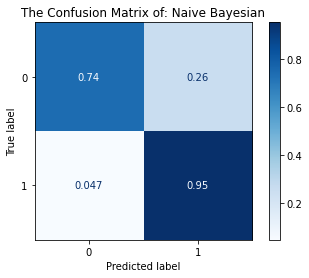

<Figure size 360x360 with 0 Axes>

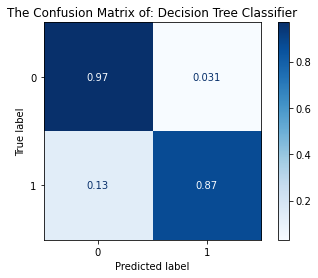

<Figure size 360x360 with 0 Axes>

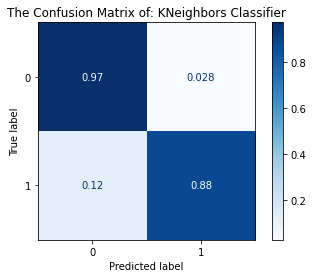

<Figure size 360x360 with 0 Axes>

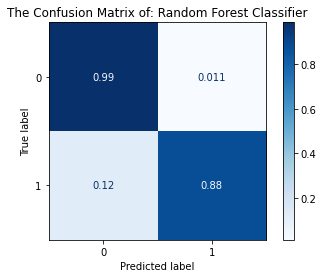

<Figure size 360x360 with 0 Axes>

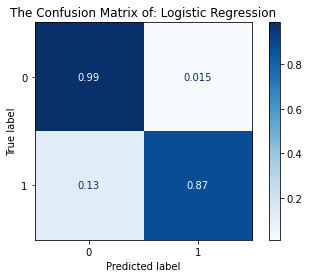

<Figure size 360x360 with 0 Axes>

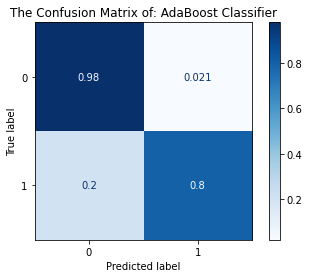

In [22]:
from sklearn.metrics import plot_confusion_matrix
for name, clf in model_ls.items():
#     print ("The Confusion Matrix of: ", name)
#     print (pd.DataFrame(confusion_matrix(y_test, y_pred)))
    plt.figure(figsize=(5,5))
    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    disp.ax_.set_title("The Confusion Matrix of: %s" % name)
    plt.show()

In [23]:
# df_models.confusion_matrix_visualization()
accuracy_f1 = df_models.accuracy_f1()
accuracy_f1.style.background_gradient(cmap='Blues')

,ML Models,Accuracy,F1-score
0,Naive Bayesian,0.782297,0.617761
1,Decision Tree Classifier,0.950494,0.866239
2,KNeighbors Classifier,0.954279,0.876181
3,Random Forest Classifier,0.968087,0.910295
4,Logistic Regression,0.964436,0.900638
5,AdaBoost Classifier,0.946033,0.845236


## ROC Curve

In [24]:
# df_models.accuracy_f1()

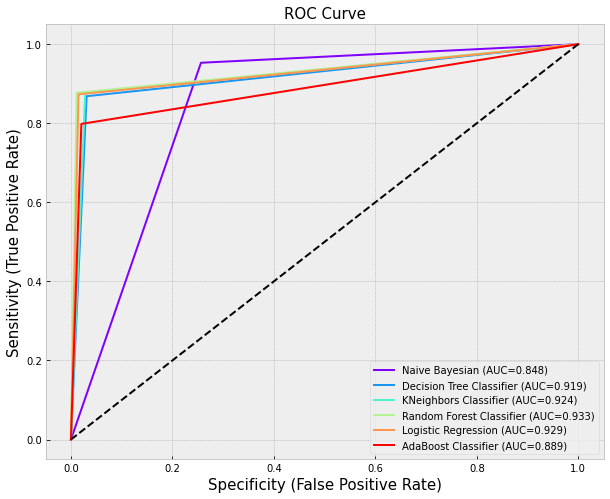

In [25]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from numpy import interp

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")
color = cm.rainbow(np.linspace(0, 1, len(model_ls)))
plt.title("ROC Curve", fontsize = 15)
plt.xlabel("Specificity (False Positive Rate)", fontsize = 15)
plt.ylabel("Sensitivity (True Positive Rate)", fontsize = 15)
labels = list()
l_roc_auc = {}

# Plot ROC Curve
for c, (name, y_pred) in enumerate(y_pred_ls.items()):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    l_roc_auc[name] = roc_auc
    plt.plot(fpr, tpr, color=color[c])
    labels.append('{} (AUC={:.3f})'.format(name, roc_auc))
  
plt.gca().legend(labels, loc='lower right', frameon=True)    
plt.plot([0,1],[0,1], linestyle='--', color='black')
plt.show()

In [26]:
l_roc_auc

{'Naive Bayesian': 0.8483330493001484,
 'Decision Tree Classifier': 0.9187410151702423,
 'KNeighbors Classifier': 0.9241293700756987,
 'Random Forest Classifier': 0.9329186114926034,
 'Logistic Regression': 0.9291303151925269,
 'AdaBoost Classifier': 0.8889017873295665}

In [27]:
# df_models.confusion_matrix_visualization()
accuracy_f1["ROC"] = l_roc_auc.values()
accuracy_f1.style.background_gradient(cmap='Blues')

,ML Models,Accuracy,F1-score,ROC
0,Naive Bayesian,0.782297,0.617761,0.848333
1,Decision Tree Classifier,0.950494,0.866239,0.918741
2,KNeighbors Classifier,0.954279,0.876181,0.924129
3,Random Forest Classifier,0.968087,0.910295,0.932919
4,Logistic Regression,0.964436,0.900638,0.929130
5,AdaBoost Classifier,0.946033,0.845236,0.888902


## Learning Curve

In [28]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import ShuffleSplit

# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt


# for name, model in model_ls.items():
#     title = "Learning Curves for " + name
#     cv=None
# #     cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#     plot_learning_curve(model, title, X, y, ylim=(0.2, 1.01), n_jobs=4)
#     plt.show()